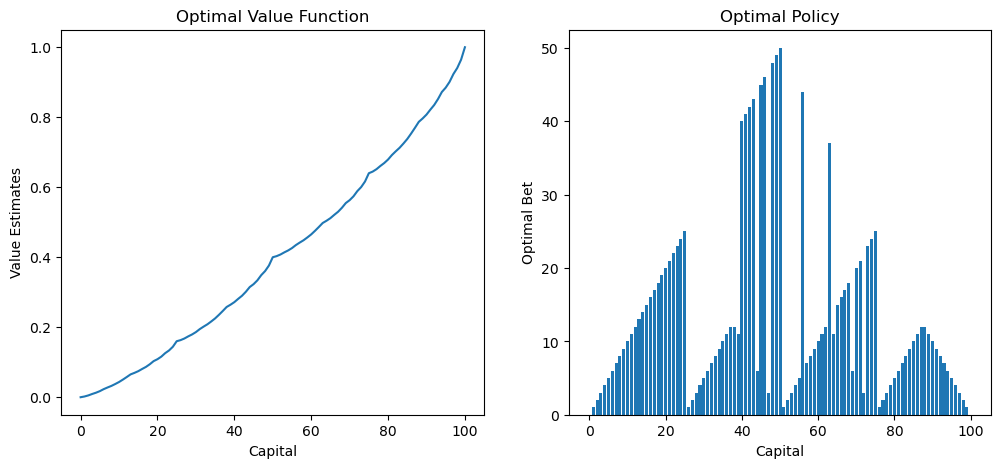

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
goal = 100
p_h = 0.4  # Probability of winning a bet
theta = 1e-9  # Convergence threshold
gamma = 1  # No discounting

# Initialize value function
V = np.zeros(goal + 1)
V[goal] = 1  # Terminal state

# Value Iteration
while True:
    delta = 0  # Track value function change
    for s in range(1, goal):
        actions = range(1, min(s, goal - s) + 1)  # Possible bets
        new_v = max(p_h * V[s + a] + (1 - p_h) * V[s - a] for a in actions)
        delta = max(delta, abs(new_v - V[s]))
        V[s] = new_v  # Update value function

    if delta < theta:  # Check for convergence
        break

# Derive optimal policy
policy = np.zeros(goal + 1)
for s in range(1, goal):
    actions = range(1, min(s, goal - s) + 1)
    best_action = max(actions, key=lambda a: p_h * V[s + a] + (1 - p_h) * V[s - a])
    policy[s] = best_action

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(V)
plt.xlabel("Capital")
plt.ylabel("Value Estimates")
plt.title("Optimal Value Function")

plt.subplot(1, 2, 2)
plt.bar(range(goal + 1), policy)
plt.xlabel("Capital")
plt.ylabel("Optimal Bet")
plt.title("Optimal Policy")

plt.show()
